#**Habitantes de Calle 2021**

Los datos para desarrollar esta actividad corresponden al Censo de Habitantes de Calle - CHC- 2021 que se encuentran en el Archivo Nacional de Datos del DANE.

El diccionario de datos se encuentra en:
https://microdatos.dane.gov.co/index.php/catalog/720/data-dictionary

Los microdatos en formato csv se encuentran en:
https://microdatos.dane.gov.co/index.php/catalog/720/get-microdata

In [1]:
# 2. Importar la libreria Pandas ;)
import pandas as pd

In [4]:
# 3. Importar un archivo csv, si el delimitador es tabulación usar /t
#df=pd.read_csv('/content/drive/MyDrive/240120 Notebooks/HabitantesCalle2021/CHC_base_anonimizada09-09-2021.csv', delimiter=',', encoding = 'unicode_escape' )
df=pd.read_csv('CHC_base_anonimizada09-09-2021.csv', delimiter=',', encoding = 'unicode_escape' )
df

,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,...,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
0,1.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,44.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,33.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,3.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,41.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,29.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,5.0,2.0,85.0,85001.0,1.0,5.0,2.0,1.0,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,7645.0,2.0,76.0,76109.0,1.0,1.0,1.0,1.0,53.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6246,7646.0,2.0,20.0,20001.0,1.0,1.0,1.0,1.0,57.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6247,7647.0,2.0,76.0,76109.0,1.0,1.0,1.0,1.0,51.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['P8R'].mean()

41.290473516750886

In [9]:
# 4 Renombrar las variables
df['sex']=df['P9'].replace({1: 'hombres', 2:'mujeres'})
df['razón'] = df['P22'].replace({1: 'consumo de sustancias psicoactivas', 2: 'gusto personal', 3: 'amenaza o riesgo para la vida', 4: 'Influencia de otras personas', 5: 'dificultades económicas', 6: 'falta de trabajo', 7: 'conflictos o dificultades familiares', 8: 'abuso  sexual', 9: 'siempre he vivido en la calle', 10: 'víctima del conflito armado o desplazado', 11: 'otra'})
df['edad']=df['P8R']
df['tiempo']=df['P23S1R']
df['marihuana'] = df['P30S3'].replace({1: 'Fuma.', 2: 'No fuma'})
df['abuso policial'] = df['P33S3'].replace({1: 'si', 2: 'no'})
df['teme'] = df['P33_1'].replace({1: 'si', 2: 'no'})

In [11]:
# 6 La edad promedio de los HC por sexo
df.groupby(['sex'])['edad'].aggregate(['count','mean']).round(1)
#print ('La edad promedio de los habitantes de calle en Colombia es aprox. 41.7 años')

,count,mean
sex,,
hombres,4744,41.7
mujeres,599,37.8


In [15]:
# 7 Intervalo de confianza del 95% para la edad promedio de los habitantes
# de calle hombres en el municipo de Cúcuta

# Confianza
confianza=0.95
# Lo que queda en las colas(5%)
alpha=1-confianza
from scipy.stats import norm
import math

# z adecuado para eso
z=norm.ppf(1-alpha/2,0,1)

# Promedio de la edad de los hombres de Cucúta
promedio=df['edad'][(df['P1S1']==54001)&(df['sex']=='hombres')].mean()

# Desviación estándar de la edad de los hombres en Cucúta.
desviacion=df['edad'][(df['P1S1']==54001)&(df['sex']=='hombres')].std()

# Cantidad de hombres habitantes de calle en Cucúta.
n=df['edad'][(df['P1S1']==54001)&(df['sex']=='hombres')].count()
#print(promedio, desviacion,n)
LI=promedio-z*desviacion/math.sqrt(n)
LS=promedio+z*desviacion/math.sqrt(n)
# print(LI,LS)
error=z*desviacion/math.sqrt(n)
print('Con una confianza del ',confianza*100, '% podemos afirmar que la edad promedio de')
print('los habitantes de calle hombres en Cúcuta se encuentra entre',LI.round(1),' y ',LS.round(1), 'años')
print('Esta estimación se hacer con un error de',error.round(2),' años')

Con una confianza del  95.0 % podemos afirmar que la edad promedio de
los habitantes de calle hombres en Cúcuta se encuentra entre 36.9  y  38.7 años
Esta estimación se hacer con un error de 0.93  años
1.959963984540054


# Para cruzar la información del códigos DANE con los nombres de los muncipios

In [12]:
# 9 Para que en la base de HC tengamos los nombres de muncipio
df['P1S1']=df['P1S1'].astype(str)
df['P1S1'] = df['P1S1'].apply(lambda x: x.replace('.0', ''))
df['COD_DANE']=df['P1S1']
df2['COD_DANE']=df2['COD_DANE'].astype(float)
df['COD_DANE']=df['COD_DANE'].astype(float)
df3 = pd.merge(left=df, right=df2, how='left', on='COD_DANE')

In [ ]:
# 7 Para ver los municipios
municipios=df3['muni'].unique()
codigos=df3['P1S1'].unique()
print(codigos)

In [ ]:
# 10 Para contar los municipios
cuenta=0
x=1
y=1
for i in municipios:
  print(i,',')#,end=" ")
  cuenta=cuenta+1
print(cuenta)

In [ ]:
# 11 Solo si quiero ver las variables del dataframe en grupso de 15
count=1
for i in df.columns:
    residuo=count % 15
    if residuo!= 0:
        print(i,end=" ")
        count=count+1
    else:
      print(i)
      count=count+1

In [ ]:
# Para listar los municipios con mas de 9 HC
df3['muni'].value_counts().loc[lambda x: x > 9]

In [18]:
# Para filtrar una tabla
tabla=pd.crosstab(df3['muni'], df3['sex'],normalize=False)
# tabla[tabla.sum(axis=1) > 30] # si ambos suman 30
tabla[tabla['mujeres'] > 15]


sex,hombres,mujeres
muni,,
Armenia,639,53
Buenaventura,92,24
Cartagena de Indias,716,60
Ibagué,443,34
Neiva,357,22
Pasto,172,36
Pereira,346,23
Riohacha,228,50
San José de Cúcuta,918,173


## Ahora ya se pueden utilizar los nombres de los municipios

In [19]:
# 11 Intervalo de confianza para la edad promedio de los habitantes de calle mujeres en Ibagué
confianza=0.92
alpha=1-confianza
from scipy.stats import norm
import math
z=norm.ppf(1-alpha/2,0,1)
promedio=df3['edad'][(df3['sex']=='mujeres')&(df3['muni']=='Ibagué')].mean()
desviacion=df3['edad'][(df3['sex']=='mujeres')&(df3['muni']=='Ibagué')].std()
n_mujeres=df3['edad'][(df3['sex']=='mujeres')&(df3['muni']=='Ibagué')].count()
print(promedio, desviacion,n_mujeres)
LI=promedio-z*desviacion/math.sqrt(n_mujeres)
LS=promedio+z*desviacion/math.sqrt(n_mujeres)
error=z*desviacion/math.sqrt(n_mujeres)
print('Con una confianza del ',confianza*100, '% podemos afirmar que la edad promedio de')
print('los habitantes de calle mujeres en Ibagué', 'se encuetra entre',LI.round(1),' y ',LS.round(1), 'años')
print('Esta estimación se hacer con un error de',error.round(2),' años')
print(n_mujeres)

40.029411764705884 12.08677036372049 34
Con una confianza del  92.0 % podemos afirmar que la edad promedio de
los habitantes de calle mujeres en Ibagué se encuetra entre 36.4  y  43.7 años
Esta estimación se hacer con un error de 3.63  años
34


In [ ]:
# 12 Intervalo de confianza del 95% para la edad promedio de los habitantes
# de calle hombres en Yopal (muestra pequeña)
n=df3['edad'][(df3['sex']=='mujeres')&(df3['muni']=='Yopal')].count()
confianza=0.95
alpha=1-confianza
from scipy.stats import t
import math
t=t.ppf(1-alpha/2, n-1)
promedio=df3['edad'][(df3['sex']=='mujeres')&(df3['muni']=='Yopal')].mean()
desviacion=df3['edad'][(df3['sex']=='mujeres')&(df3['muni']=='Yopal')].std()
#print(promedio, desviacion,n)
LI=promedio-t*desviacion/math.sqrt(n)
LS=promedio+t*desviacion/math.sqrt(n)
#print(LI,LS)
error=t*desviacion/math.sqrt(n)
print('La siguiente estimación está hecha con muestra pequeña n=',n,':')
print('Con una confianza del ',confianza*100, '% podemos afirmar que la edad promedio de')
print('los habitantes de calle mujeres en Yopal', 'se encuetra entre',LI.round(1),' y ',LS.round(1), 'años')
print('Esta estimación se hacer con un error de',error.round(2),' años')

La siguiente estimación está hecha con muestra pequeña n= 22 :
Con una confianza del  95.0 % podemos afirmar que la edad promedio de
los habitantes de calle mujeres en Yopal se encuetra entre 22.2  y  28.8 años
Esta estimación se hacer con un error de 3.28  años


In [21]:
# Calcular e interpretar los siguientes intervalos de confianza para la media
# El promedio del tiempo en años que llevan en la calle los HOMBRE-MUJER HC en el MUNICIPIO
# Que se encuentran en esa condición principalmente por RAZÓN
variable='P23S1R'
municipio='San José de Cúcuta'
sexo='hombres'
razon='consumo de sustancias psicoactivas'
n=df3[variable][(df3['muni']==municipio)&(df3['sex']==sexo)].count()
alpha=1-confianza
import math
if (n<2):
  print('Muy pocos datos para calcular un intervalo de confinaza n es',n)
elif (n>=2) & (n<30):
  from scipy.stats import t
  t=norm.ppf(1-alpha/2,n-1)
  promedio=df3[variable][(df3['muni']==municipio)&(df3['sex']==sexo)].mean()
  desviacion=df3[variable][(df3['muni']==municipio)&(df3['sex']==sexo)].std()
  print('Esta es una estimación basada en una muestra pequeña de n=',n)
  LI=promedio-t*desviacion/math.sqrt(n)
  LS=promedio+t*desviacion/math.sqrt(n)
  error=t*desviacion/math.sqrt(n)
  print('Con una confianza del ',confianza*100, '% podemos afirmar que el promedio de',variable)
  print('de los habitantes de calle', sexo, 'en el municipio de', municipio, 'cuya razón para estar en la calle es', razon)
  print('se encuetra entre',LI.round(1),' y ',LS.round(1), 'años')
  print('Esta estimación se hace con un error de estimación',error.round(2),'años')
else:
  from scipy.stats import norm
  z=norm.ppf(1-alpha/2,0,1)
  promedio=df3[variable][(df3['muni']==municipio)&(df3['sex']==sexo)].mean()
  desviacion=df3[variable][(df3['muni']==municipio)&(df3['sex']==sexo)].std()
  print('Esta es una estimación basada en una muestra grande de n=',n)
  LI=promedio-z*desviacion/math.sqrt(n)
  LS=promedio+z*desviacion/math.sqrt(n)
  error=z*desviacion/math.sqrt(n)
  print('Con una confianza del ',confianza*100, '% podemos afirmar que el promedio de',variable)
  print('de los habitantes de calle', sexo, 'en el municipio de', municipio, 'cuya razón para estar en la calle es', razon)
  print('se encuetra entre',LI.round(1),' y ',LS.round(1), 'años')
  print('Esta estimación se hace con un error de estimación de ',error.round(2),'años')

Esta es una estimación basada en una muestra grande de n= 918
Con una confianza del  92.0 % podemos afirmar que el promedio de P23S1R
de los habitantes de calle hombres en el municipio de San José de Cúcuta cuya razón para estar en la calle es consumo de sustancias psicoactivas
se encuetra entre 6.4  y  7.6 años
Esta estimación se hace con un error de estimación de  0.55 años


# Taller sobre intervalos de confianza

1.	Muestre todos los cálculos e interprete un intervalo de confianza del 90 para la edad promedio de las mujeres que empezaron a vivir en la calle por gusto personal.



2.	Calcule e interprete el margen de error en la estimación del promedio en años que llevan viviendo en la calle las mujeres que actualmente consumen pepas (use alfa=0.05).


3.	Muestre todos los cálculos e interprete un intervalo de confianza del 95% de la proporción de hombres que empezaron a vivir en la calle por amenazas o riesgo para la vida o integridad física.


4.	Calcule e interprete el margen de error de la proporción de hombres con problemas mentales o emocionales (use alfa=0.01).


5.	Muestre todos los cálculo y halle el tamaño de muestra necesario para estimar la edad promedio de los habitantes de calle con una confianza del 99% y con un error máximo de un año

##**Prueba de hipótesis**

#¿Será que el promedio de la edad de las habitantes de calle mujeres es 35 años?

## Prueba de hipótesis <br>

1.   Hipótesis nula H0 <br>
2.   Hipótesis alternativa Ha <br>
3.   Prueba estadística y su valor p <br>
4.   Región de rechazo <br>
5.   Conclusión


## Las hipótesis en competencia son la **hipótesis alternativa Ha** (hipótesis de investigación) y la **hipótesis nula H0**(una contradicción de la hipótesis alternativa)

## Posibilidades de conclusión: <br>

* Rechazar H0 y concluir que Ha es verdadera
* No rechazar H0



## La decisión de rechazar o no rechazar la hipótesis nula se basa en la información contenida en una muestra aleatoria representativa extraida de la población de interés:

*   **Prueba estadística**: un único número calculado a partir de los datos de la muestra
*   **Valor p**: una probabilidad calculada a partir de la prueba estadística. **El valor p es la probabilidad de observar una prueba estadística tan extrema o más que el valor observado bajo el supuesto de que H0 es verdadera**



## El conjunto de todos los posibles valores de la prueba estadística se divide en dos regiones. La primera corresponde a los valores que apoyan la hipótesis alternativa y ocasionan el rechazo de H0 **región de rechazo**. El otro corresponde a los valores que apoyan la hipótesis nula y se designa como **región de no rechazo**

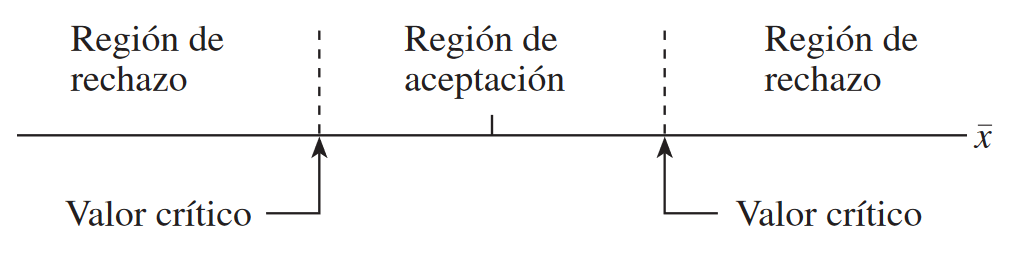

## El **error tipo I** es la probabilidad de rechazar la hipótesis nula cuando esta es verdadera.<br>
## El **nivel de significancia** para una prueba de hipótesis es: <br>
## alpha=P(error tipo I)=P(**rechazar H0 cuando H0 es verdadera**)

In [ ]:
#¿Será que el promedio de la edad de las habitantes de calle mujeres es 35 años?
promedio=df['edad'][df['sex']=='mujeres'].mean()
desviacion=df['edad'][df['sex']=='mujeres'].std()
print(promedio,desviacion)

37.8297161936561 14.446570402957706


## 1. Hipótesis nula<br>
##H0: La edad promedio de las habitantes de calle mujeres es de 35 años

## 2. Hipótesis alternativa<br>
##Ha: La edad promedio de las habitantes de calle mujeres no es de 35 años

# 3. Prueba estadística

In [ ]:
n=df['edad'][df['sex']=='mujeres'].count()
miu=35
import math
prueba= (promedio-miu)/(desviacion/math.sqrt(n))
prueba,n

(4.793928285710761, 599)

# 4. Región de rechazo & p-value

In [ ]:
# Región de rechazo
confianza=0.95
alpha=1-confianza
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
print('Región de rechazo:')
print('valores z que sean más pequeños que ', -z, ' o valores z que sean más grandes que ',z)

Región de rechazo:
valores z que sean más pequeños que  -1.959963984540054  o valores z que sean más grandes que  1.959963984540054


# Valor p

In [ ]:
# Valor p
from scipy.stats import norm
p_value=norm.cdf(-abs(prueba),0,1)+ norm.sf(abs(prueba), 0, 1) # suma de probabilidades de cola a izquierda y derecha respectivamente
print("{:.10f}".format(p_value))

0.0000016355


# 5. Conclusion

In [ ]:
print('Primera forma de conclusión:')
print('Como el valor de la prueba estadística es ', prueba)
print('y los valores críticos son:', -z, ' y ', z)
print('por lo tanto se rechaza H0, es decir, la edad promedio de las habitantes de calle no puede ser 35 años')

Primera forma de conclusión:
Como el valor de la prueba estadística es  4.793928285710761
y los valores críticos son: -1.959963984540054  y  1.959963984540054
por lo tanto se rechaza H0, es decir, la edad promedio de las habitantes de calle no puede ser 35 años


In [ ]:
print('Segunda forma de conclusión:')
print('Como el valor p es ',"{:.10f}".format(p_value))
print('y este valor es inferior a ', "{:.2f}".format(alpha))
print('Por lo tanto, se rechaza H0,  es decir, la edad promedio de las habitantes de calle no puede ser 35 años')

Segunda forma de conclusión:
Como el valor p es  0.0000016355
y este valor es inferior a  0.05
Por lo tanto, se rechaza H0,  es decir, la edad promedio de las habitantes de calle no puede ser 35 años


## ¿La mitad de los habitantes de calle están allí principalmente por el consumo de drogas?



In [ ]:
df['razón'].value_counts(normalize=True)

razón
consumo de sustancias psicoactivas          0.334831
conflictos o dificultades familiares        0.256972
dificultades económicas                     0.154220
gusto personal                              0.077672
falta de trabajo                            0.070185
otra                                        0.045106
Influencia de otras personas                0.022459
víctima del conflito armado o desplazado    0.019652
amenaza o riesgo para la vida               0.011230
siempre he vivido en la calle               0.005428
abuso  sexual                               0.002246
Name: proportion, dtype: float64

### 1. Hipotesis nula: El 50% de los habitantes de calle están allí principalemente por el consumo de drogas


### 2. Hipotesis alternativa: El 50% de los habitantes de calle no están allí principalmente por el consumo de drogas

In [ ]:
df.razón.value_counts(normalize=True)

razón
consumo de sustancias psicoactivas          0.334831
conflictos o dificultades familiares        0.256972
dificultades económicas                     0.154220
gusto personal                              0.077672
falta de trabajo                            0.070185
otra                                        0.045106
Influencia de otras personas                0.022459
víctima del conflito armado o desplazado    0.019652
amenaza o riesgo para la vida               0.011230
siempre he vivido en la calle               0.005428
abuso  sexual                               0.002246
Name: proportion, dtype: float64

In [ ]:
# Estadístico de prueba
x= df['razón'][df['razón']=='consumo de sustancias psicoactivas'].count()
n=df['razón'].count()
pe=x/n
p0=0.5
z=(pe-p0)/math.sqrt(p0*(1-p0)/n)
print(pe,x,n,n*pe,(n*(1-pe)),"El estadístico de prueba es:",z)




0.33483061950215237 1789 5343 1789.0000000000002 3553.9999999999995 El estadístico de prueba es: -24.14638509502824


In [ ]:
# Valor p
from scipy.stats import norm
p_value=norm.cdf(-abs(z),0,1)+ norm.sf(abs(z), 0, 1) # suma de probabilidades de cola a izquierda y derecha respectivamente
print("{:.10f}".format(p_value))

0.0000000000


#**IC y pruebas de hipótesis para la diferencia de medias**

##**¿Hay diferencia significativa entre la edad promedio de los hombres y mujeres que están en la calle por el consumo de sustancias psicoactivas**

In [ ]:
df[df['razón']=='consumo de sustancias psicoactivas'].groupby(['sex'])['edad'].aggregate(['mean','std','count']).round(1)

,mean,std,count
sex,,,
hombres,38.4,12.7,1636
mujeres,34.4,11.1,153


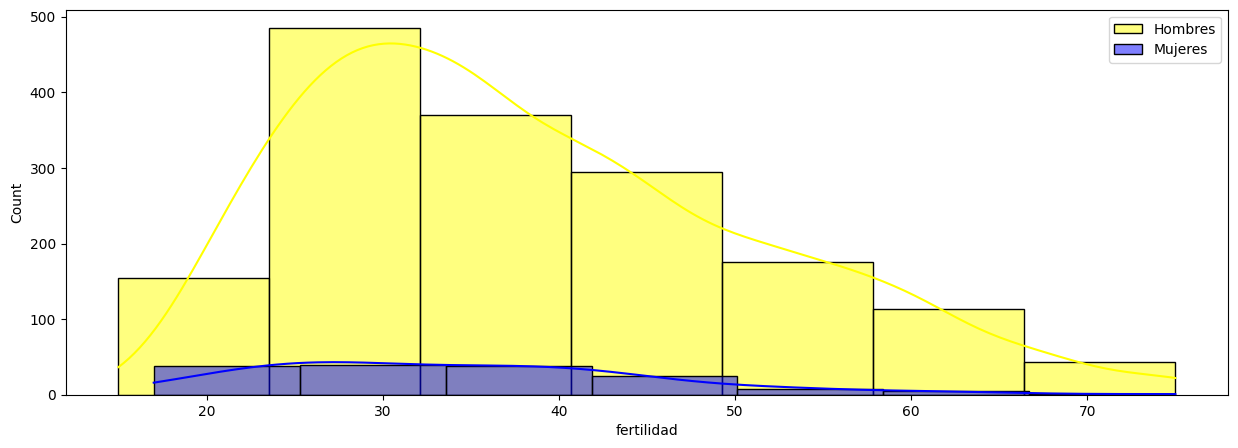

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot( df['edad'][(df['razón']=='consumo de sustancias psicoactivas')&(df['sex']=='hombres')] ,bins=7, color="yellow", label="Hombres",kde=True)
sns.histplot( df['edad'][(df['razón']=='consumo de sustancias psicoactivas')&(df['sex']=='mujeres')] ,bins=7, color="blue", label="Mujeres",kde=True)
ax.set_xlabel("fertilidad")
plt.legend();

In [25]:
df.pivot_table(index='razón',columns='sex',values='edad',aggfunc='mean').round(1)

sex,hombres,mujeres
razón,,
Influencia de otras personas,37.3,36.7
abuso sexual,35.8,39.6
amenaza o riesgo para la vida,42.4,42.1
conflictos o dificultades familiares,41.9,37.9
consumo de sustancias psicoactivas,38.4,34.4
dificultades económicas,45.6,36.3
falta de trabajo,46.0,40.2
gusto personal,41.7,43.4
otra,46.6,46.2


## **IC para la diferencia de medias**

In [30]:
promedio1=df['edad'][(df['sex']=='hombres')&(df['razón']=='consumo de sustancias psicoactivas')].mean()
desviacion1=df['edad'][(df['sex']=='hombres')&(df['razón']=='consumo de sustancias psicoactivas')].std()
n1=df['edad'][(df['sex']=='hombres')&(df['razón']=='consumo de sustancias psicoactivas')].count()
promedio2=df['edad'][(df['sex']=='mujeres')&(df['razón']=='consumo de sustancias psicoactivas')].mean()
desviacion2=df['edad'][(df['sex']=='mujeres')&(df['razón']=='consumo de sustancias psicoactivas')].std()
n2=df['edad'][(df['sex']=='mujeres')&(df['razón']=='consumo de sustancias psicoactivas')].count()
print('hombres: ', promedio1, desviacion1,n1)
print('mujeres: ', promedio2, desviacion2,n2)

hombres:  38.369804400978 12.726943374908982 1636
mujeres:  34.40522875816993 11.095540775996415 153


In [31]:
confianza=0.95
alpha=1-confianza
from scipy.stats import norm
z=norm.ppf(1-alpha/2,0,1)
import math
z

1.959963984540054

In [32]:
LI=(promedio1-promedio2)-z*math.sqrt(desviacion1**2/n1+desviacion2**2/n2)
LS=(promedio1-promedio2)+z*math.sqrt(desviacion1**2/n1+desviacion2**2/n2)
print(LI.round(1),LS.round(1))

2.1 5.8


Conclusión por medio del IC: como el IC del 95% no contiene al cero, asumimos que existe diferencia significativa entre la edad promedio de hombres y mujeres cuya principal razón para estar en la calle es el consumo de sustancias psicoactivas.

## Prueba de hipótesis

### 1. Hipótesis nula<br>
###H0: La edad promedio de los habitantes de calle hombres y mujeres que están en la calle por el consumo de sustancias psicoactivas es la misma.

### 2. Hipótesis alternativa<br>
### Ha: La edad promedio de las habitantes de calle hombres y mujeres que están en la calle por el consumo de sustancias psicoactivas no es la misma

### 3. Prueba estadística

In [33]:
sp2=((n1-1)*desviacion1**2+(n2-1)*desviacion2**2)/(n1+n2-2)
tc=(promedio1-promedio2)/math.sqrt(sp2*(1/n1+1/n2))
print(tc)

3.7229085639916075


### 3. Región de rechazo

In [34]:
confianza=0.95
alpha=1-confianza
from scipy.stats import t
tcritico=t.ppf(1-alpha/2,n1+n2-2)
import math
print('Región de rechazo:')
print('valores t que sean más pequeños que ', -tcritico, ' o valores t que sean más grandes que ',tcritico)

Región de rechazo:
valores t que sean más pequeños que  -1.9612923849278272  o valores t que sean más grandes que  1.9612923849278272


### Valor p

In [35]:
from scipy.stats import t
p_value=t.cdf(-abs(tc),df=n1+n2-2) +t.sf(abs(tc)  ,df=n1+n2-2)# suma de probabilidades de cola a izquierda y derecha respectivamente
print("{:.10f}".format(p_value))

0.0002030426


### Conclusión

In [36]:
print('Primera forma de conclusión:')
print('Como el valor de la prueba estadística es ', tc.round(5))
print('y los valores críticos son:', -tcritico, ' y ', tcritico)
print('con una confianza del ', confianza*100, '% no se rechaza H0, es decir, la edad promedio de las habitantes de calle hombres y mujeres que estan en la calle')
print('por consumo de sustancias no es significativamente diferente')

Primera forma de conclusión:
Como el valor de la prueba estadística es  3.72291
y los valores críticos son: -1.9612923849278272  y  1.9612923849278272
con una confianza del  95.0 % no se rechaza H0, es decir, la edad promedio de las habitantes de calle hombres y mujeres que estan en la calle
por consumo de sustancias no es significativamente diferente


In [37]:
print('Segunda forma de conclusión:')
print('Como el valor p es ',"{:.10f}".format(p_value))
print('y este valor es superior a ', "{:.2f}".format(alpha))
print('no se rechaza H0,  es decir, la edad promedio de las habitantes de calle hombres y mujeres que estan en la calle')
print('por consumo de sustancias no es significativamente diferente')

Segunda forma de conclusión:
Como el valor p es  0.0002030426
y este valor es superior a  0.05
no se rechaza H0,  es decir, la edad promedio de las habitantes de calle hombres y mujeres que estan en la calle
por consumo de sustancias no es significativamente diferente
